<a href="https://colab.research.google.com/github/Varun-Mayilvaganan/My_Machine_Learns/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
boston_dataset = pd.read_csv('/content/HousingData.csv')

In [22]:
print(boston_dataset.head().to_string())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90    NaN  36.2


In [26]:
boston_dataset.shape

(506, 14)

In [27]:
boston_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlations:
positive,
negative

In [28]:
correlation = boston_dataset.corr()

Constructing heatmap => understand correlations

<Axes: >

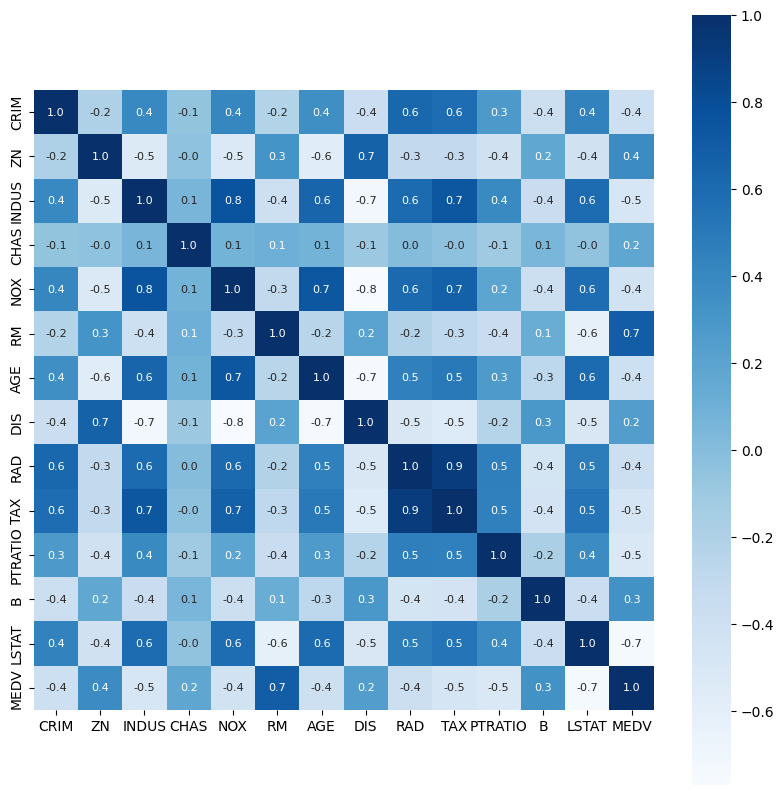

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [36]:
X = boston_dataset.drop('MEDV',axis=1)
Y = boston_dataset['MEDV']

In [38]:
print(X.to_string())
print(Y.to_string())

         CRIM     ZN  INDUS  CHAS     NOX     RM    AGE      DIS  RAD  TAX  PTRATIO       B  LSTAT
0     0.00632   18.0   2.31   0.0  0.5380  6.575   65.2   4.0900    1  296     15.3  396.90   4.98
1     0.02731    0.0   7.07   0.0  0.4690  6.421   78.9   4.9671    2  242     17.8  396.90   9.14
2     0.02729    0.0   7.07   0.0  0.4690  7.185   61.1   4.9671    2  242     17.8  392.83   4.03
3     0.03237    0.0   2.18   0.0  0.4580  6.998   45.8   6.0622    3  222     18.7  394.63   2.94
4     0.06905    0.0   2.18   0.0  0.4580  7.147   54.2   6.0622    3  222     18.7  396.90    NaN
5     0.02985    0.0   2.18   0.0  0.4580  6.430   58.7   6.0622    3  222     18.7  394.12   5.21
6     0.08829   12.5   7.87   NaN  0.5240  6.012   66.6   5.5605    5  311     15.2  395.60  12.43
7     0.14455   12.5   7.87   0.0  0.5240  6.172   96.1   5.9505    5  311     15.2  396.90  19.15
8     0.21124   12.5   7.87   0.0  0.5240  5.631  100.0   6.0821    5  311     15.2  386.63  29.93
9     0.17

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


### *XGBoost Regressor*

In [42]:
model = XGBRegressor()

In [43]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
test_data_pred = model.predict(X_test)
print(test_data_pred)

[20.383139  22.656385  30.826708  27.878897   8.805948  13.600548
 26.303036  30.727125  17.798553  20.170778  26.527412  24.576565
 20.54291   21.095081  26.6565    22.502972  18.869703   9.9264145
  9.314949  14.770702  22.454021  19.507164  34.395382  17.945509
 15.361209  18.913652  45.609146  33.094124  33.8779    19.872215
 15.981635  19.835049  30.112732  23.200474   9.11869   17.311817
  9.549464  21.379145  21.905293  21.554203  25.519806  13.072706
 28.900301   7.2484136 21.321661  14.178026  34.397423  16.688627
 30.466244  16.124792  31.119566  28.480316   6.387809  32.930214
 24.125877  19.955687  18.902025  19.524641  16.026045  22.490847
 20.169174  19.523516  18.003931  28.294247  31.94455   25.29936
 49.33432   30.476421   9.341851  23.330816  15.17611    7.1256075
 16.744974  18.707571  26.943642  23.695763  21.748068  21.540483
 18.718529  23.907902  34.802128  17.281298  20.355326  30.420004
 34.182224  34.86396   15.5575695 24.698465  30.766768  16.379473
 20.87336

In [45]:
training_data_pred = model.predict(X_train)
print(training_data_pred)

[23.10556   20.995161  20.098679  34.694107  13.90913   13.503013
 21.991356  15.19639   10.901248  22.69718   13.810051   5.5994563
 29.803614  49.997128  34.89243   20.59913   23.397764  19.208693
 32.69327   19.599798  26.990992   8.401674  46.004715  21.697937
 27.07413   19.372515  19.290953  24.80479   22.600445  31.683664
 18.527308   8.700464  17.40693   23.698957  13.300282  10.498531
 12.704187  25.011072  19.698133  14.903836  24.199064  24.99671
 14.903162  16.99955   15.596944  12.703466  24.515984  15.002214
 49.998177  17.514849  21.200884  32.014084  15.601433  22.900557
 19.30743   18.713701  23.301996  37.197086  30.099365  33.101482
 21.000624  49.986263  13.402558   5.005925  16.504436   8.400528
 28.684137  19.482313  20.600052  45.402576  39.801155  33.39976
 19.80939   33.399323  25.28783   49.995678  12.51284   17.42555
 18.59748   22.592402  49.99892   23.790628  23.307434  23.098652
 41.706337  16.106485  31.619875  36.09759    7.0018873 20.399048
 19.99105   

## *Training data*

In [47]:
#  R-squared errors
score1 = metrics.r2_score(Y_train, training_data_pred)

# mean absolute errors
score2 = metrics.mean_absolute_error(Y_train, training_data_pred)


print("R-Squared error", score1)
print("Mean-abs-Error",score2)

R-Squared error 0.9999987142043713
Mean-abs-Error 0.007200302700005027


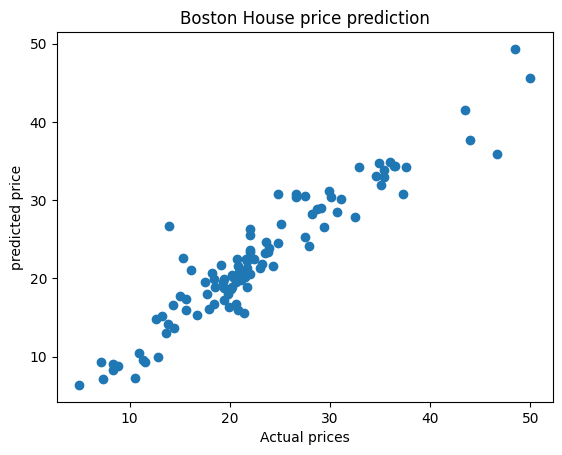

In [51]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel('Actual prices')
plt.ylabel('predicted price')
plt.title('Boston House price prediction')
plt.show()

## *Testing data*


In [49]:
#  R-squared errors
score1 = metrics.r2_score(Y_test, test_data_pred)

# mean absolute errors
score2 = metrics.mean_absolute_error(Y_test, test_data_pred)


print("R-Squared error", score1)
print("Mean-abs-Error",score2)

R-Squared error 0.8948011220086851
Mean-abs-Error 2.087377268660302


### *Prediction System*

In [54]:
# Define the input values you want to check
input_values = [[0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93]]

# Use the predict() function of your trained model to make predictions
prediction = model.predict(input_values)

print(prediction)


[16.505434]
